# **Convolutional Neural Network (CNN) in PyTorch using FashionMNIST**

### **Importing Libraries**

In [48]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

### **Download and Prepare the Fashion MNIST Dataset**

Fashion-MNIST is a dataset of Zalando's article images, consisting of 60,000 training examples and 10,000 test examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.


In [49]:
# Define the transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# Download and load the test dataset
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

# Define the classes in the dataset
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

### **Verify the Data**

Plot the first 25 images in the training set along with their labels.

In [50]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.yticks([])
    plt.xticks([])
    plt.show()

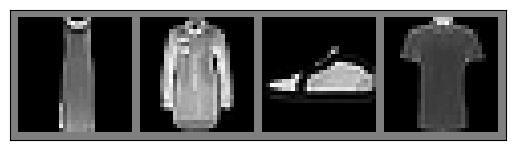

Dress Dress Sneaker Shirt


In [51]:
# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### **Define a Convolutional Neural Network**

In [ ]:
def forward(self, x):
    # Apply the first convolution, ReLU activation, and max pooling
    # Convolution: Extract features from the input image.
    # ReLU: Introduce non-linearity.
    # Max Pooling: Downsample feature maps.
    x = self.pool(F.relu(self.conv1(x)))
    
    # Apply the second convolution, ReLU activation, and max pooling
    # Convolution: Extract more complex features.
    # ReLU: Introduce non-linearity.
    # Max Pooling: Further downsample feature maps.
    x = self.pool(F.relu(self.conv2(x)))
    
    # Flatten the tensor from 4D (N, C, H, W) to 2D (N, C*H*W)
    # N: Batch size, C: Number of channels, H: Height, W: Width
    # This prepares the tensor for fully connected layers.
    x = x.view(-1, 16 * 4 * 4)
    
    # Apply the first fully connected layer and ReLU activation
    # Fully connected layer: Transform the input features.
    # ReLU: Introduce non-linearity.
    x = F.relu(self.fc1(x))
    
    # Apply the second fully connected layer and ReLU activation
    # Fully connected layer: Further transform the features.
    # ReLU: Introduce non-linearity.
    x = F.relu(self.fc2(x))
    
    # Apply the third fully connected layer (output layer)
    # Produces the final class scores (logits) for 10 classes.
    return self.fc3(x)


In [52]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # 1 input channel (gray-scale), 6 output channels, 5x5 kernel
        # Applies 2x2 max pooling with a stride of 2, reducing the spatial dimensions by half.
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5) # 6 input channels, 16 output channels, 5x5 kernel
        # Takes input of size 16*4*4 (from flattened feature maps after pooling),
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # Fully connected layer with 120 neurons
        self.fc2 = nn.Linear(120, 84)    # Fully connected layer with 84 neurons
        self.fc3 = nn.Linear(84, 10)     # Fully connected layer with 10 neurons (output layer)

    def forward(self, x):        
        # Convolution: Extract features from the input image.
        # ReLU: Introduce non-linearity. Max Pooling: Downsample feature maps.
        x = self.pool(F.relu(self.conv1(x)))  # Apply convolution, ReLU, and pooling
        x = self.pool(F.relu(self.conv2(x)))  # Apply convolution, ReLU, and pooling
        # Flatten the tensor from 4D (N, C, H, W) to 2D (N, C*H*W)
        # N: Batch size, C: Number of channels, H: Height, W: Width
        # This prepares the tensor for fully connected layers.
        x = x.view(-1, 16 * 4 * 4)            
        x = F.relu(self.fc1(x))               # Apply fully connected layer and ReLU
        x = F.relu(self.fc2(x))               # Apply fully connected layer and ReLU
        x = self.fc3(x)                       # Apply fully connected layer (output)
        return x

model = Net()

### **Define a Loss function and optimizer**

In [53]:
# Using Cross Entropy Loss and SGD with momentum
criterion = nn.CrossEntropyLoss()
# nn.CrossEntropyLoss combines `nn.LogSoftmax()` and `nn.NLLLoss()` in one single class. 
# It's used for classification problems where the model outputs raw scores (logits) for each class.
# It computes the loss between the predicted class probabilities and the true class labels.

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
# optim.SGD is Stochastic Gradient Descent optimizer, used to update model weights.
# `model.parameters()` provides the parameters of the model to be optimized.
# lr=0.001 is the learning rate, controlling the step size for each iteration of weight updates.
# momentum=0.9 helps accelerate SGD in the relevant direction and dampens oscillations.

### **Train the network**

In [59]:
# Lists to store loss and accuracy for plotting
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

# Training the network for 11 epochs
num_epochs = 11

In [60]:
for epoch in range(num_epochs):
    running_loss = 0.0  
    correct_train = 0  
    total_train = 0    
    model.train()       # Set the network to training mode

    for data in trainloader:  
        inputs, labels = data  # Unpack the batch into inputs (images) and labels
        optimizer.zero_grad()  # Zero the gradients of the optimizer
        outputs = model(inputs)  # Forward pass: compute the model's predictions
        loss = criterion(outputs, labels)  # Compute the loss between predictions and true labels
        loss.backward()  # Backward pass: compute gradients
        optimizer.step()  # Update model parameters based on gradients

        # Update training statistics
        running_loss += loss.item()  # Accumulate the loss for this epoch
        _, predicted = torch.max(outputs.data, 1)  # Get the predicted class labels
        total_train += labels.size(0)  # Update the total number of training samples
        correct_train += (predicted == labels).sum().item()  # Count correct predictions

    # Calculate training loss and accuracy for the epoch
    train_loss = running_loss / len(trainloader)  # Average loss per batch
    train_accuracy = 100 * correct_train / total_train  
    train_losses.append(train_loss) 
    train_accuracies.append(train_accuracy)  

    # Validation phase
    model.eval()  # Set the model to evaluation mode (disables dropout, batch normalization, etc.)
    val_loss = 0.0  
    correct_val = 0  
    total_val = 0    

    with torch.no_grad():  # Disable gradient computation for validation
        for val_data in testloader:  # Iterate over batches of validation data
            val_images, val_labels = val_data  # Unpack the batch into images and labels
            val_outputs = model(val_images)  # Forward pass: compute the model's predictions
            loss = criterion(val_outputs, val_labels)  # Compute the loss for the validation batch
            val_loss += loss.item()  # Accumulate the validation loss
            _, val_predicted = torch.max(val_outputs.data, 1)  # Get the predicted class labels
            total_val += val_labels.size(0)  # Update the total number of validation samples
            correct_val += (val_predicted == val_labels).sum().item()  # Count correct predictions

    # Calculate validation loss and accuracy for the epoch
    val_loss = val_loss / len(testloader)  # Average loss per batch for validation
    val_accuracy = 100 * correct_val / total_val  
    val_losses.append(val_loss)  
    val_accuracies.append(val_accuracy)  

    # Print the results for the epoch
    print(f'Epoch [{epoch + 1}/{num_epochs}] '
          f'Train Loss: {train_loss:.3f}, Train Accuracy: {train_accuracy:.2f}%, '
          f'Val Loss: {val_loss:.3f}, Val Accuracy: {val_accuracy:.2f}%')

print('Finished Training')

Epoch [1/11] Train Loss: 0.192, Train Accuracy: 92.79%, Val Loss: 0.306, Val Accuracy: 89.39%
Epoch [2/11] Train Loss: 0.184, Train Accuracy: 92.93%, Val Loss: 0.336, Val Accuracy: 88.85%
Epoch [3/11] Train Loss: 0.179, Train Accuracy: 93.15%, Val Loss: 0.313, Val Accuracy: 89.86%
Epoch [4/11] Train Loss: 0.173, Train Accuracy: 93.41%, Val Loss: 0.336, Val Accuracy: 89.13%
Epoch [5/11] Train Loss: 0.170, Train Accuracy: 93.41%, Val Loss: 0.330, Val Accuracy: 89.55%
Epoch [6/11] Train Loss: 0.164, Train Accuracy: 93.76%, Val Loss: 0.337, Val Accuracy: 89.21%
Epoch [7/11] Train Loss: 0.163, Train Accuracy: 93.75%, Val Loss: 0.340, Val Accuracy: 89.28%
Epoch [8/11] Train Loss: 0.158, Train Accuracy: 93.92%, Val Loss: 0.346, Val Accuracy: 89.45%
Epoch [9/11] Train Loss: 0.155, Train Accuracy: 94.09%, Val Loss: 0.369, Val Accuracy: 89.70%
Epoch [10/11] Train Loss: 0.155, Train Accuracy: 94.08%, Val Loss: 0.367, Val Accuracy: 88.68%
Epoch [11/11] Train Loss: 0.151, Train Accuracy: 94.30%, Va

### **Evaluate the Network on Test Data**

In [61]:
correct = 0
total = 0
all_labels = []
all_preds = []

# Set the network to evaluation mode
model.eval()


Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [62]:
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        loss = criterion(outputs, labels)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels)
        all_preds.extend(predicted)

Final Accuracy of the network on the 10000 test images: 89.24 %
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.82      0.83      1000
     Trouser       1.00      0.97      0.99      1000
    Pullover       0.87      0.81      0.84      1000
       Dress       0.86      0.93      0.89      1000
        Coat       0.83      0.83      0.83      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.67      0.70      0.68      1000
     Sneaker       0.95      0.96      0.96      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



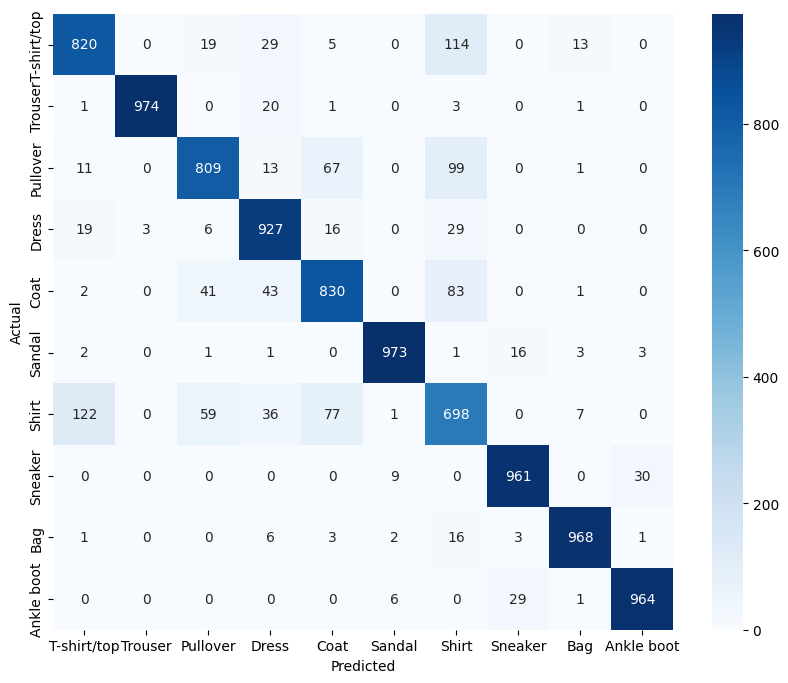

In [63]:
# Print accuracy of the network on the test images
print(f'Final Accuracy of the network on the 10000 test images: {100 * correct / total:.2f} %')

# Generate classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds, target_names=classes))

# Generate confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### **Plot Accuracy and Loss**

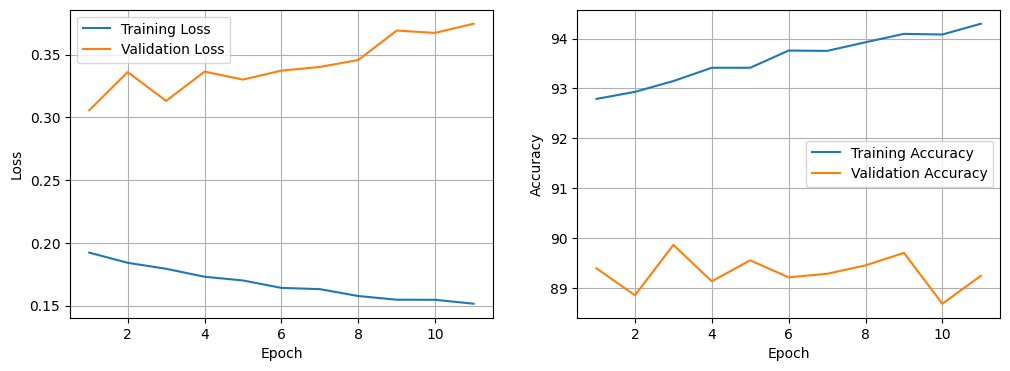

In [64]:
# Plotting loss and accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.show()